# Section D: Linear Regression for Machine Learning
# Part 1: The Linear Regression Model


In [2]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter='\t')

train = data[:1460]
test = data[1460:]
print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

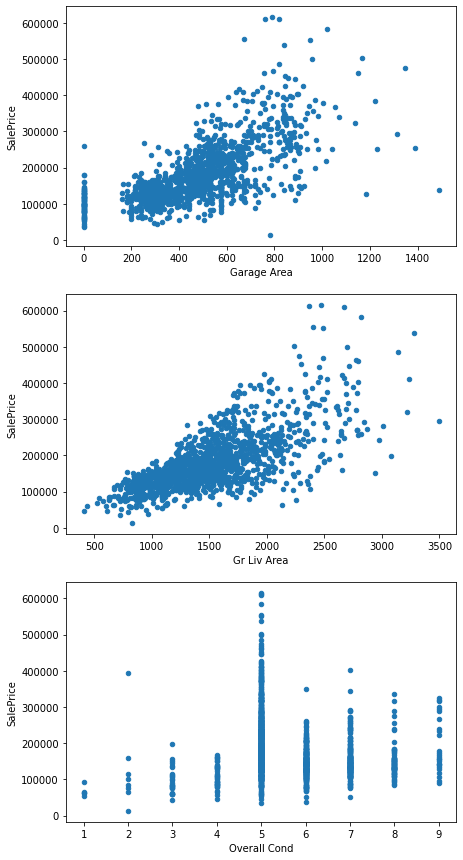

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()


In [4]:
# For the middle figure 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056043


In [20]:
# Now we do the prediction 
import numpy as np
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])



In [22]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions,test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse, test_rmse)

56034.362001412796 57088.25161263909


## 7. Multiple Linear Regression 

In [24]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])
train_rmse_2 = np.sqrt (mean_squared_error (train_predictions,
                                            train['SalePrice']))
test_rmse_2 = np.sqrt (mean_squared_error (test_predictions,
                                           test['SalePrice']))
print (train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


# Part II. Feature Selection

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('AmesHousing.txt',delimiter='\t')
train = data[:1460]
test= data[1460:]

In [5]:
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 1. Missing value



In [7]:
numerical_train = [col for col in train.columns 
                   if (train[col].dtype == 'int' or
                       train[col].dtype == 'float')]

In [10]:
len(numerical_train)

39

In [12]:
numerical_train.remove(['PID'])

ValueError: list.remove(x): x not in list

In [15]:
remove_items = ['PID','Year Built', 'Year Remod/Add',
                'Garage Yr Blt','Mo Sold','Yr Sold']

In [20]:
numerical_train

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [25]:
numerical_train = [x for x in numerical_train if x not in remove_items]

In [97]:
# check the missing value in numerical_train
# train[numerical_train] for x in numerical_train if x.
null_series = data[numerical_train].isnull().sum()

In [98]:
full_cols_series = null_series[null_series.values == 0]

In [99]:
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [100]:
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


In [101]:
len(full_cols_series)

23

In [102]:
#2. Correlating Feature columns with Target column

In [103]:
train_subset = train[full_cols_series.index]
train_subset.corr()

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,...,-0.029653,-0.055643,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,...,0.054067,-0.064293,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,...,0.205604,0.232112,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730
Overall Qual,-0.049116,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,...,0.360203,0.386205,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562
Overall Cond,0.078547,-0.099862,-0.010353,-0.083581,1.000000,-0.154903,-0.009733,-0.015807,-0.133710,-0.223043,...,-0.116560,-0.056623,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,-0.099395
1st Flr SF,-0.060288,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,...,0.360595,0.429662,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119
2nd Flr SF,0.011011,0.342229,0.005407,0.200105,-0.009733,-0.311660,1.000000,-0.017831,0.647971,0.396149,...,0.570879,0.133245,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.202352
Low Qual Fin SF,0.016425,-0.001077,-0.013667,-0.070362,-0.015807,-0.011781,-0.017831,1.000000,0.075539,-0.013896,...,0.073844,-0.011067,-0.029479,-0.014001,0.144095,-0.000762,-0.026807,-0.002486,-0.007269,-0.060352
Gr Liv Area,-0.036472,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,...,0.807301,0.460746,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990
Full Bath,-0.074932,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,...,0.517731,0.245036,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194


In [104]:
sorted_corrs = train_subset.corr()['SalePrice'].sort_values(ascending=False)

In [105]:
sorted_corrs

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Pool Area          0.145474
Bedroom AbvGr      0.106941
Screen Porch       0.100121
3Ssn Porch         0.038699
Misc Val          -0.009903
Low Qual Fin SF   -0.060352
Order             -0.068181
MS SubClass       -0.088504
Overall Cond      -0.099395
Kitchen AbvGr     -0.130843
Enclosed Porch    -0.165873
Name: SalePrice, dtype: float64

# 3. Correlation Matrix Heatmap

In [106]:
strong_corrs = [index for index, value in sorted_corrs.items() if value > 0.3]

In [107]:
len(strong_corrs)

9

In [108]:
corrmat = train_subset[strong_corrs]

<AxesSubplot:>

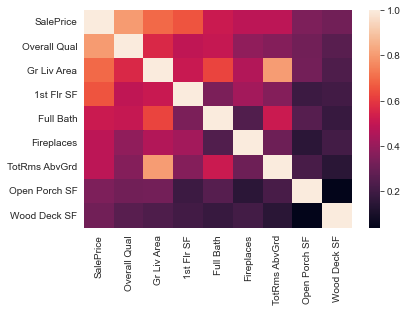

In [109]:
import seaborn as sns

sns.heatmap(corrmat.corr())

In [112]:
### although the pair of  
# "Gr Liv Area" and "TotRms AbvGrd"  
# "Garage Area" and "Garage Cars"
#  are in dark color. according to the documntation, they are very similar information. So we drop them from the strong_corrs columns



In [113]:
remove_items2 = ['Garage Cars','TotRms AbvGrd']
final_corr_cols = [i for i in strong_corrs
    if i not in remove_items2]

In [114]:
test[final_corr_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1470 non-null   int64
 1   Overall Qual   1470 non-null   int64
 2   Gr Liv Area    1470 non-null   int64
 3   1st Flr SF     1470 non-null   int64
 4   Full Bath      1470 non-null   int64
 5   Fireplaces     1470 non-null   int64
 6   Open Porch SF  1470 non-null   int64
 7   Wood Deck SF   1470 non-null   int64
dtypes: int64(8)
memory usage: 92.0 KB


In [115]:
clean_test = [ index for index, value in test[final_corr_cols].isnull().sum().items() if value == 0 ]

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()

features = [col for col in final_corr_cols if col not in ['SalePrice']] 
target = 'SalePrice'

lr.fit(train[features],train[target])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse =np.sqrt(train_mse)
test_rmse =np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

35782.36767818103
41810.4331552837


In [121]:
unit_train = (train[features]-
              train[features].min())/(train[features].max()-
                                      train[features].min())
print(unit_train.min())
print(unit_train.max())

Overall Qual     0.0
Gr Liv Area      0.0
1st Flr SF       0.0
Full Bath        0.0
Fireplaces       0.0
Open Porch SF    0.0
Wood Deck SF     0.0
dtype: float64
Overall Qual     1.0
Gr Liv Area      1.0
1st Flr SF       1.0
Full Bath        1.0
Fireplaces       1.0
Open Porch SF    1.0
Wood Deck SF     1.0
dtype: float64


In [132]:
train['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
1455    235000
1456    230500
1457    230000
1458    222500
1459    287000
Name: SalePrice, Length: 1460, dtype: int64

In [142]:
# run the prediction again
clean_test = test[features]

features = [col for col in features if col not in ['Open Porch SF']]

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)
print(train_rmse_2)
print(test_rmse_2)

35984.30198972422
41407.80815424183


In [ ]:
# ==== draft

In [96]:
test[features].isnull().any()

Overall Qual     False
Gr Liv Area      False
Garage Area       True
1st Flr SF       False
Full Bath        False
Fireplaces       False
Open Porch SF    False
Wood Deck SF     False
dtype: bool